In [29]:
import src as fa
import pickle
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from datetime import timedelta

### Load the model

In [30]:
model = pickle.load(open("run_output/run_output_model.p", "rb"))

### Run prediction for a single test image and all cascades

In [31]:
test_image_number = 0

test_folder = "data/test/"

test_names = fa.get_all_file_names(test_folder)
test_file_name = test_names[test_image_number]

predict_start_time = timer()
predict_result = model.predict_image(test_folder+test_file_name)
predict_end_time = timer()

if predict_result is None:
    print("prediction failed ...")
else:
    I_padded, S_hat_predicted, features_hat_predicted = predict_result
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    ax.scatter(S_hat_predicted[:,0], S_hat_predicted[:,1], c='r', s=2)
    ax.imshow(I_padded, cmap='gray')

print("Predict run finished in: (Time)", timedelta(seconds=predict_end_time-predict_start_time))


AttributeError: 'MultipleCascades' object has no attribute 'predict_image'

### Run prediction for a single test image wih intermediate results for each cascade

Predict run (wiht intermediate steps) finished in: (Time) 0:00:01.163643


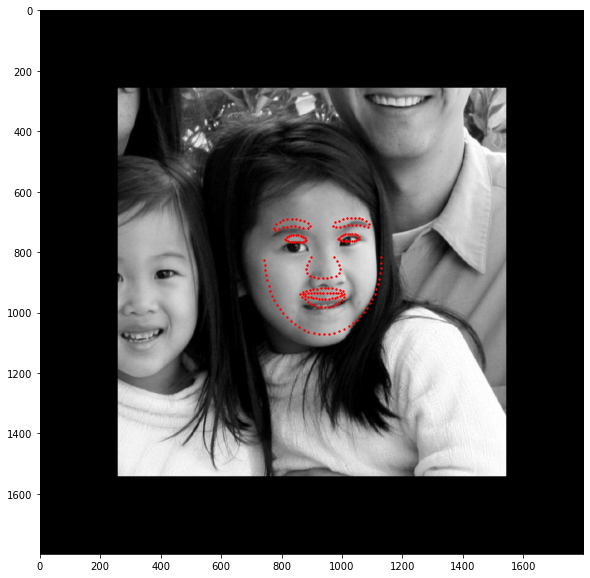

In [ ]:
test_image_number = 0
cascade_t = 0

test_folder = "data/test/"

test_names = fa.get_all_file_names(test_folder)
test_file_name = test_names[test_image_number]

predict_start_time = timer()
predict_result = model.predict_image_with_intermediate_steps(test_folder+test_file_name)
predict_end_time = timer()

if predict_result is None:
    print("prediction failed ...")
else:
    I_padded, S_hat_predicted_list, features_hat_predicted_list = predict_result
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 10)
    ax.scatter(S_hat_predicted_list[cascade_t][:,0], S_hat_predicted_list[cascade_t][:,1], c='r', s=2)
    ax.imshow(I_padded, cmap='gray')

print("Predict run (wiht intermediate steps) finished in: (Time)", timedelta(seconds=predict_end_time-predict_start_time))


### Run validation (compute error) for all images

In [32]:
validation_folder = "data/test/"

validate_start_time = timer()
validate_result = model.compute_error_all(validation_folder, 'data/annotation/')
validate_end_time = timer()

if validate_result is None:
    print("validation failed ...")
else:
    validation_error = validate_result
    print("Validation error:", validation_error)

print("Validation run finished in: (Time)", timedelta(seconds=validate_end_time-validate_start_time))

### Compute mean validation error

In [ ]:
np.mean(np.array(validation_error), axis=0)

array([ 9.38971837, 11.35495365, 10.8610148 , 10.2076123 , 10.23634525,
       10.06845759, 10.02723044, 10.02107561, 10.02005604, 10.02527642,
       10.01583854])